In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [204]:
df_jobs = pd.read_csv('/content/jobs.csv')
df_company = pd.read_csv('/content/company.csv')
df_de = pd.read_csv('/content/de.csv')

In [205]:
jobs_company_df = pd.merge(df_jobs, df_company, on='company_id')
jobs_company_df.head()

,job_id,company_id,location,designation,details_id,name,industry,employees_count,linkedin_followers
0,1,1,India,Data Analytics Intern,1,Unified Mentor,E-Learning Providers,51-200,"42,049"
1,2,2,"Delhi, India",Python Developer,2,Tata Consultancy Services,IT Services and IT Consulting,"10,001+","15,234,184"
2,3,3,"Delhi, Delhi, India",Software Analyst - Power BI,3,Bechtel Corporation,Construction,"10,001+","1,085,287"
3,4,4,"Delhi, India",Postgres DB,4,Tata Consultancy Services,IT Services and IT Consulting,"10,001+","15,234,184"
4,5,5,India,Data Analyst,5,Ajackus,IT Services and IT Consulting,51-200,"9,025"


### 1. Number of Jobs Distribution Across Various Industries

---





In [206]:
# Count the number of jobs per industry
industry_counts = merged_df['industry'].value_counts().reset_index()
industry_counts.columns = ['industry', 'Job Count']

In [207]:
industry_counts

,industry,Job Count
0,IT Services and IT Consulting,103
1,Software Development,35
2,Business Consulting and Services,27
3,Financial Services,23
4,E-Learning Providers,19
5,"Technology, Information and Internet",18
6,Staffing and Recruiting,13
7,Pharmaceutical Manufacturing,6
8,Human Resources Services,6
9,Banking,6


<ipython-input-208-240f98ed9ede>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




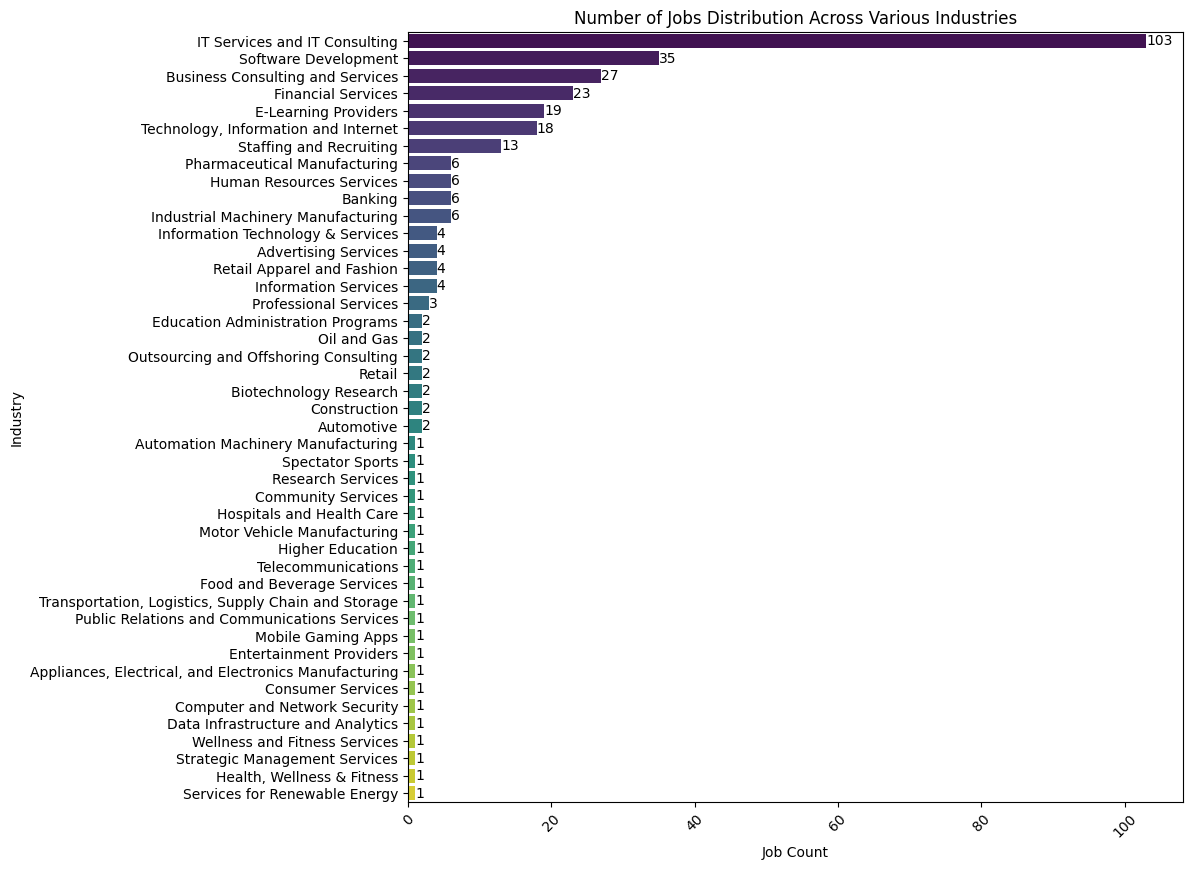

In [208]:
plt.figure(figsize=(10, 10))
sns.barplot(x='Job Count', y='industry', data=industry_counts, palette='viridis')

for index, value in enumerate(industry_counts['Job Count']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)

plt.title('Number of Jobs Distribution Across Various Industries')
plt.xlabel('Job Count')
plt.ylabel('Industry')
plt.xticks(rotation=45)
plt.show()

In [209]:
industry_counts = pd.DataFrame({
    'industry': ['industry {}'.format(i) for i in range(1, 44)],
    'Job Count': [i * 10 for i in range(1, 44)]
})


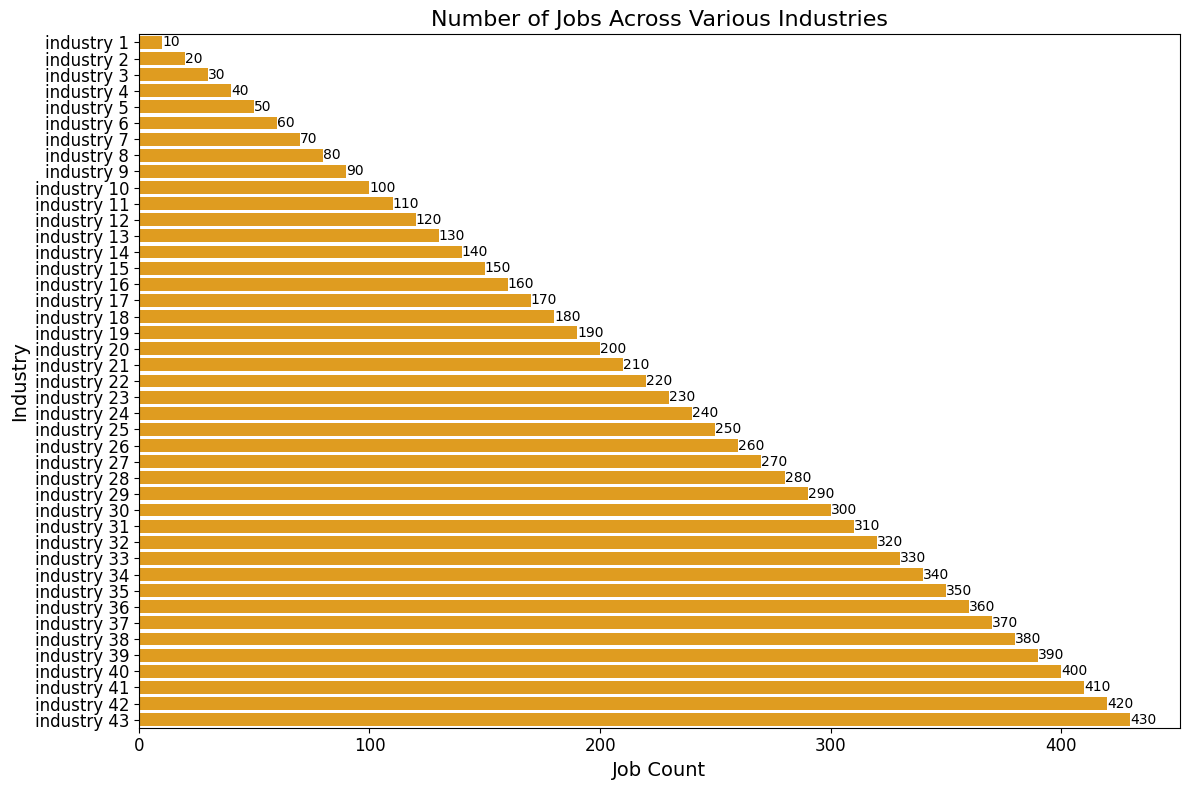

In [225]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Job Count', y='industry', data=industry_counts, color='orange')

for index, value in enumerate(industry_counts['Job Count']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)

plt.title('Number of Jobs Across Various Industries', fontsize=16)
plt.xlabel('Job Count', fontsize=14)
plt.ylabel('Industry', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### 2. Number of Openings with Respect to the Current Employee Count



In [226]:
employee_count_jobs = jobs_company_df['employees_count'].value_counts().reset_index()
employee_count_jobs.columns = ['Employee Count', 'Job Count']

<ipython-input-227-add1b2ac7bec>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




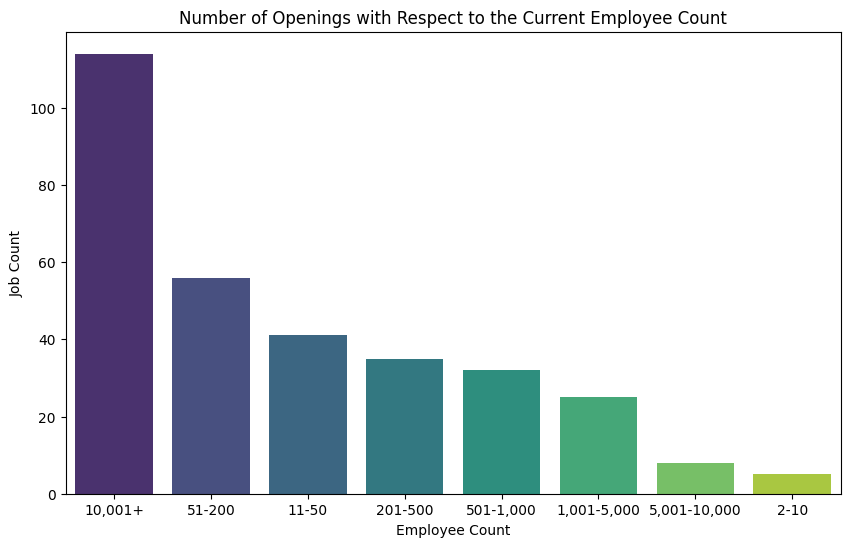

In [227]:
plt.figure(figsize=(10,6))
sns.barplot(x='Employee Count', y='Job Count', data=employee_count_jobs, palette=sns.color_palette("viridis", len(employee_count_jobs)))
plt.title("Number of Openings with Respect to the Current Employee Count")
plt.xlabel('Employee Count')
plt.ylabel('Job Count')
plt.show()

### 3. Comparison of Number of Jobs Across Different Cities for Different Levels



In [228]:
jobs_de_df = pd.merge(df_jobs, df_de, on='job_id')
jobs_de_df.head()

,job_id,company_id_x,location,designation,details_id_x,company_id_y,details_id_y,level,total_applicants
0,1,1,India,Data Analytics Intern,1,1,1,Internship,10.0
1,2,2,"Delhi, India",Python Developer,2,2,2,Full,100.0
2,3,3,"Delhi, Delhi, India",Software Analyst - Power BI,3,3,3,Full,100.0
3,4,4,"Delhi, India",Postgres DB,4,4,4,Full,40.0
4,5,5,India,Data Analyst,5,5,5,Full,100.0


In [229]:
city_level_jobs = jobs_de_df.groupby(['location', 'level']).size().unstack().fillna(0)


In [230]:
city_level_jobs

level,Associate,Contract,Entry,Full,Hybrid,Internship,Mid,On,Part,Remote
location,,,,,,,,,,
APAC,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
"Bagalur, Karnataka, India",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"Bangalore Urban, Karnataka, India",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"Bengaluru East, Karnataka, India",0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
"Bengaluru, Karnataka, India",0.0,1.0,3.0,25.0,0.0,0.0,1.0,1.0,0.0,0.0
"Bhopal, Madhya Pradesh, India",0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
"Delhi, Delhi, India",1.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
"Delhi, India",0.0,1.0,0.0,12.0,1.0,0.0,1.0,2.0,0.0,0.0
"Dwarka, Delhi, India",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


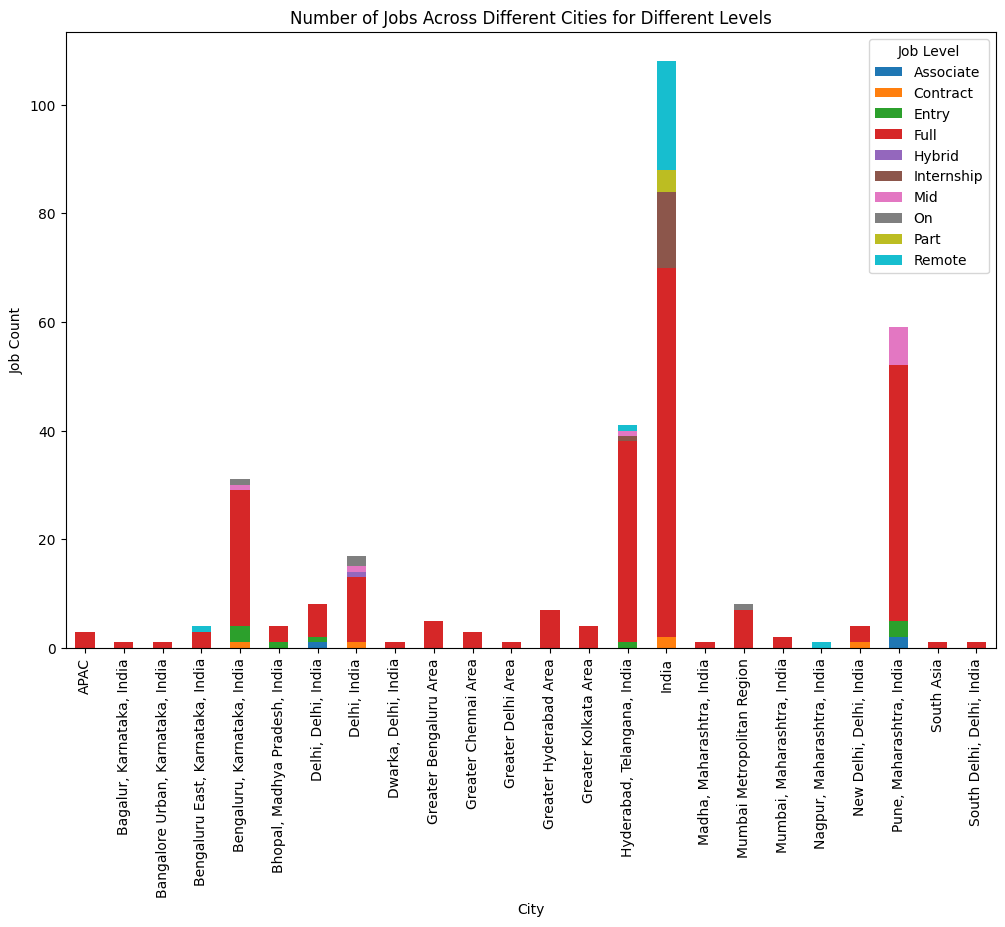

In [231]:
city_level_jobs.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Number of Jobs Across Different Cities for Different Levels')
plt.xlabel('City')
plt.ylabel('Job Count')
plt.legend(title='Job Level')
plt.show()

## 4. Jobs Across Different Levels

In [232]:
level_counts = df_de['level'].value_counts()


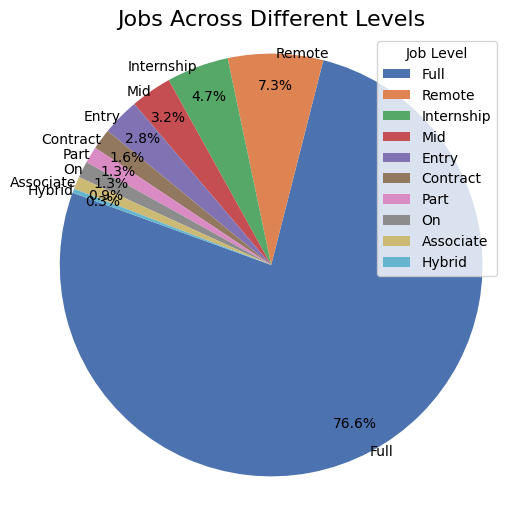

In [242]:
plt.figure(figsize=(6, 6))
plt.pie(
    level_counts,
    labels=level_counts.index,
    autopct='%1.1f%%',
    startangle=160,
    colors=sns.color_palette('deep', len(level_counts)),
    textprops={'fontsize': 10},  # Increase font size of labels and percentages
    pctdistance=0.85,  # Distance of percentage labels from center
    labeldistance=1.0
  )
plt.title('Jobs Across Different Levels', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title='Job Level', fontsize=10)
plt.show()

### 5.  Relation between total_applicants and LinkedIn_followers columns

In [243]:
company_de_df = pd.merge(df_company, df_de, on='company_id')
company_de_df.head()

,company_id,name,industry,employees_count,linkedin_followers,job_id,details_id,level,total_applicants
0,1,Unified Mentor,E-Learning Providers,51-200,"42,049",1,1,Internship,10.0
1,2,Tata Consultancy Services,IT Services and IT Consulting,"10,001+","15,234,184",2,2,Full,100.0
2,3,Bechtel Corporation,Construction,"10,001+","1,085,287",3,3,Full,100.0
3,4,Tata Consultancy Services,IT Services and IT Consulting,"10,001+","15,234,184",4,4,Full,40.0
4,5,Ajackus,IT Services and IT Consulting,51-200,"9,025",5,5,Full,100.0


In [245]:
company_de_df.dtypes

company_id              int64
name                   object
industry               object
employees_count        object
linkedin_followers     object
job_id                  int64
details_id              int64
level                  object
total_applicants      float64
dtype: object

In [247]:
numeric_columns = ['linkedin_followers', 'total_applicants']
company_de_df[numeric_columns] = company_de_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [248]:
company_de_df.dtypes

company_id              int64
name                   object
industry               object
employees_count        object
linkedin_followers    float64
job_id                  int64
details_id              int64
level                  object
total_applicants      float64
dtype: object

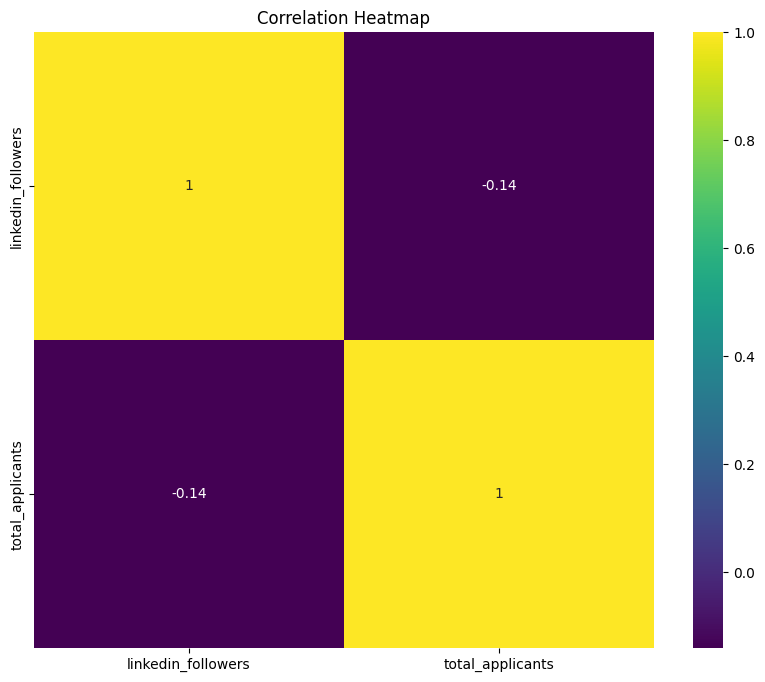

In [255]:
plt.figure(figsize=(10, 8))
sns.heatmap(company_de_df[numeric_columns].corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()